In [78]:
# imported required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [4]:
# imported dataset file
df = pd.read_csv(r'D:\ML\Machine_Learning\Data sets\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check for shape
df.shape

(891, 12)

## Data Cleaning

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# removing unnecessary columns
df.drop(columns=['PassengerId','Name','Parch','Cabin','Ticket'],axis=1,inplace=True)

In [8]:
# check for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [9]:
# removed null values
df = df.dropna()

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

38

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
883    False
885    False
887    False
889    False
890    False
Length: 674, dtype: bool

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  674 non-null    int64  
 1   Pclass    674 non-null    int64  
 2   Sex       674 non-null    object 
 3   Age       674 non-null    float64
 4   SibSp     674 non-null    int64  
 5   Fare      674 non-null    float64
 6   Embarked  674 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 42.1+ KB


In [21]:
# checking for statistics of the data
df.describe()

,Survived,Pclass,Age,SibSp,Fare
count,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.416914,2.225519,29.752849,0.537092,35.720580
std,0.493415,0.846039,14.693174,0.947016,54.101153
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,16.100000
75%,1.000000,3.000000,39.000000,1.000000,34.584400
max,1.000000,3.000000,80.000000,5.000000,512.329200


## EDA

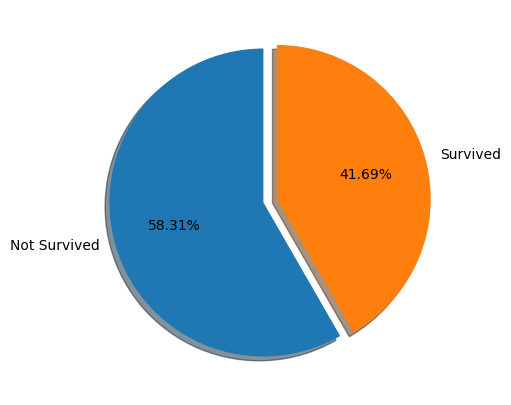

In [22]:
# using pie plot 
values = df['Survived'].value_counts()
label = ['Not Survived','Survived']

fig, ax = plt.subplots(figsize=(5,5))
plt.pie(values,labels=label,autopct='%1.2f%%',shadow=True,startangle=90,explode=(0,0.09))

plt.show()

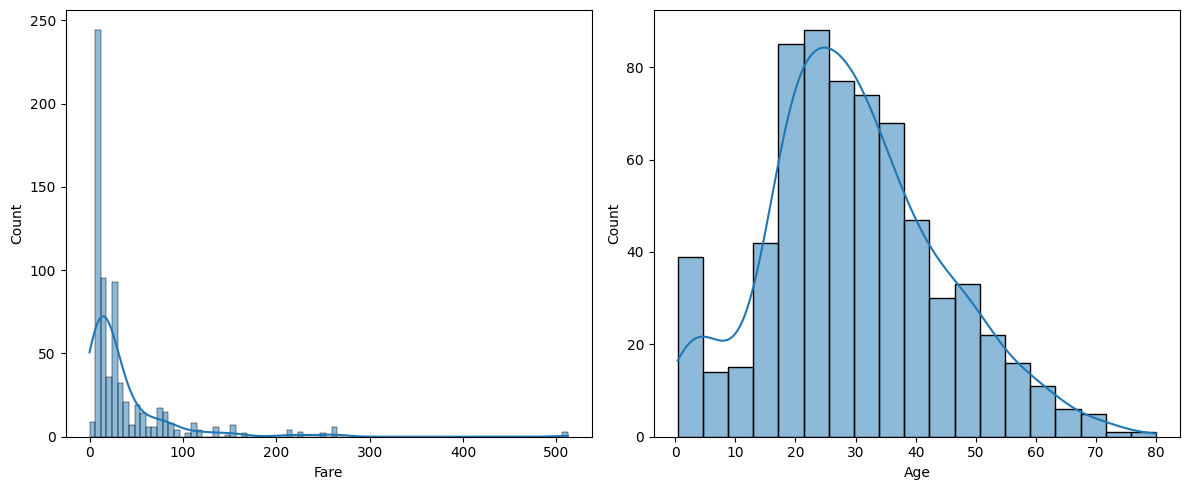

In [23]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df,x='Fare',kde=True,ax=ax[0])
sns.histplot(data=df,x='Age',kde=True,ax=ax[1])

plt.tight_layout()
plt.show()

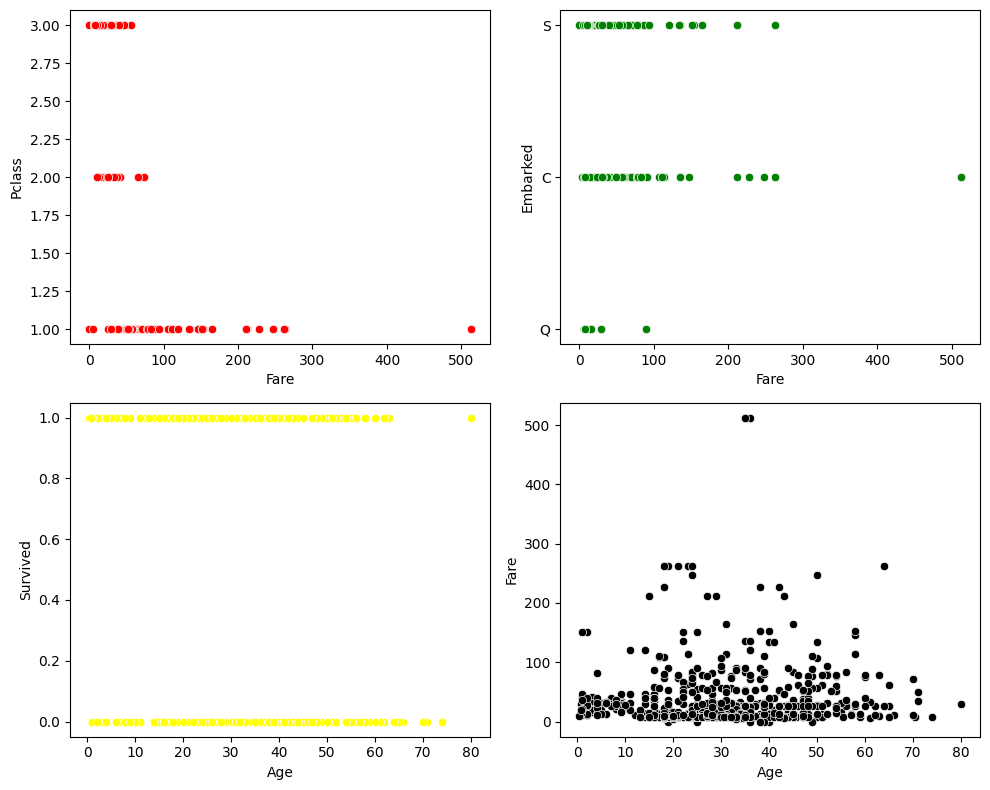

In [24]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
sns.scatterplot(data=df,x='Fare',y='Pclass',ax=ax[0,0],color='red')
sns.scatterplot(data=df,x='Fare',y='Embarked',ax=ax[0,1],color='green')
sns.scatterplot(data=df,x='Age',y='Survived',ax=ax[1,0],color='yellow')
sns.scatterplot(data=df,x='Age',y='Fare',ax=ax[1,1],color='black')


plt.tight_layout()
plt.show()

## Data Preprocessing

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [28]:
# encoding the categorical columns
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])

df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,2
1,1,1,0,38.0,1,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,1,53.1000,2
4,0,3,1,35.0,0,8.0500,2


In [40]:
# X and Y for trianing the model
X = df.drop(columns='Survived')
y = df['Survived']

In [74]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [63]:
# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# logistic regrssion algorithm
model1 = LogisticRegression(penalty='l2',solver='newton-cg')
model1.fit(X_train_scaled,y_train)
y_pred1 = model1.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test,y_pred1)
print(f"Logistic Regressaion Accuracy: {log_accuracy}")

Logistic Regressaion Accuracy: 0.8518518518518519


In [77]:
# random forest algorithm
model2 = RandomForestClassifier(n_estimators=50)
model2.fit(X_train_scaled,y_train)
y_pred2 = model2.predict(X_test_scaled)
ran_accuracy = accuracy_score(y_test,y_pred2)
print(f"Random Forest Accuracy: {ran_accuracy}")

Random Forest Accuracy: 0.8444444444444444
